In [157]:
# ms-python.python added
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
try:
	os.chdir(os.path.join(os.getcwd(), 'lab 3'))
	print(os.getcwd())
except:
	pass

 ## Integrantes

 1. Sebastian Guerraty
 2. María José Jiménez
 3. Gabriela Alfaro

 # Instrucciones

 El laboratorio tiene 6 ptos, donde obtener 6 ptos equivale a un 7.0 y 0 ptos un 1.0.

 El formato de entrega será subir a u-cursos un Jupyter notebook
 laboratorio1.ipynb, que se debe ejecutar sin errores desde la primera celda a la última. Todo el código debe estar en el mismo notebook, el código debe estar comentado y testeado, el notebook debe estar escrito en forma de informe técnico, escribiendo una celda markdown antes o después de cada celda de código que arroja algún output.

 ## 1. Teórico, 2 ptos

1.1 ¿En qué consisten las transformaciones Box-Cox, Z-Score y Max-Min? Describa al menos 2 ventajas y desventajas de cada una de estas transformaciones en una tabla comparativa. **(0.5 ptos)**

Box-Cox: La transformación está definida como una función continua que varía con respecto a la potencia lambda, donde, si lambda es cero, se lleva a cabo la transformación logarítmica de la serie inicial, y si es distinto a cero, la transformación es potencial.
Desventajas: Solo es aplicable a las series con valores positivos o cero. Se necesita una busqueda de un lambda que logre que la transformación se acerque al máximo a los datos.
Ventajas: Corrige varianzas desiguales. Es útil para corregir la no linealidad en la relación.

Z-Score: son transformaciones que se pueden hacer a los valores o puntuaciones de una distribución normal, con el propósito de analizar su distancia respecto a la media, expresándolas en unidades de desviación estándar.
Desventajas: Es posible que el rango de valores generados no sea útil. No siempre queremos variables normales.
Ventajas: Considera propiedades de la distribución. Es útil cuando el mínimo y máximo de A son desconocidos.

Max-Min: Se hace una transformación lineal sobre los datos originales. Se calcula como el cociente de la diferencia entre el valor del indicador Xi y el valor mínimo Xmin, dividido por el rango absoluto (Xmax - Xmin).
Desventajas: La distribución obtenida puede no ser la deseada. La variable puede perder interpretación.
Ventajas: Es muy sencillo. Es útil en modelos en que se conoce el mínimo y el máximo.

1.2 ¿Es estrictamente necesario realizar una transformación de los atributos en un proceso de minería de datos? ¿En qué casos podría no ser necesario? De al menos un ejemplo. **(0.5 ptos)**
No es estrictamente necesario. Como ya sabemos, el objetivo de transformar los atributos es para codificar categorías, generar distintas variables comparables y normalizar. Sin embargo, si la base de datos que se entrega viene con el mismo tipo de data, normalizado, y no necesita más variables que las que contiene para poder generar el resultado deseado, en ese caso no sería necesario pasar por el proceso de transformación.

1.3 Suponga que está analizando una encuesta con datos socioeconómicos (similar al Censo), y descubre que la variable **sueldo** tiene un 60% de datos perdidos. A qué tipo de dato perdido cree que corresponde: ¿MCAR, MAR, NMAR? Justique su elección ¿Qué haría con esta variable suponiendo que su objetivo es predecir nivel de estudios de una persona (enseñanza básica, media, universitaria, etc)? Explique. **(1.0 pto)**
Los datos perdidos del sueldo corresponden a MAR, dado que, si las personas con bajos sueldos fueran menos propensas a reportarlos que las personas con mayores ganancias, la probabilidad de la pérdida de observaciones se correlaciona con el ingreso. Reemplazaría los valores con regresiones para obtener valores más precisos, a pesar de que ésto aumente las correlaciones. Dado que es probable que el sueldo esté relacionado con el nivel de estudios, descartaría las opciones que quizá afecten con mayor seriedad el resultado (eliminar, sustituír por media, mediana y/o moda, simple hot deck).


 ## 2. Aplicación, 4 ptos

 ---
 Considere el problema que enfrenta una entidad financiera que tiene altas tasas de fuga voluntaria. Esta institución no tiene claro cuál es el perfil característico que tienen los clientes fugitivos ni cuáles son las razones por las cuales estos se fugan.

 El gerente general le ha pedido **definir el patrón característico de los clientes fugitivos y de los clientes no fugitivos con el objetivo de definir una serie de políticas comerciales** que permitan retener a estos potenciales clientes fugitivos.

 **Tareas:**

 2.1 Resuelva los problemas de inconsistencia y valores pérdidos en la base de datos, justificando cada una de sus decisiones. Impute al menos una variable utilizando regresión lineal con el resto de columnas como regresores.
 **Nota**: no deben quedar valores perdidos. **(1.5 ptos)**


 2.2 Aplique 2 métodos de transformación sobre 2 variables distintas, grafique la distribución antes y después. Comente si las transformaciones tienen sentido y cuál sería su utilidad **(1.0 pto)**


 2.3 Aplique las técnicas de selección que considere pertinentes y elimine de la base aquellos atributos que no son relevantes según sus criterios, elimine al menos 2 **(1.0 pto)**


 2.4 Comente respecto a patrones encontrados entre clientes fugitivos y no fugitivos. Apóyese en gráficos y test estadísticos. **(0.5 ptos)**


 ---
 Variable | Descripción
 ------------- | -------------
 1. customer | ID
 2. Age | Edad
 3. Employ | Años en el mismo empleo
 4. Address | Años viviendo en el mismo lugar
 5. Income | Ingreso en USD
 6. Debtinc | Ratio Ingreso/Deuda
 7. Creddebt | Monto de deuda en tarjetas de crédito
 8. OthDebt | Monto de otras deudas
 9. Education | Nivel educacional
 10. Nationality | Nacionalidad
 11. Default | Variable objetivo

### 2.1 Resuelva los problemas de inconsistencia y valores pérdidos en la base de datos, justificando cada una de sus decisiones. Impute al menos una variable utilizando regresión lineal con el resto de columnas como regresores.

In [158]:
import pandas as pd



In [159]:
url = "https://raw.githubusercontent.com/Camiloez/lab3-dataset/master/data_lab.csv"
df = pd.read_csv(url)



In [160]:
df.head(5)
#df[df['Age']>=80]
#df[df['Income']<0]
#df['Default'].unique()
#df['Education'].unique()



,customer,Age,Employ,Address,Income,Debtinc,Creddebt,OthDebt,Education,Nationality,Default
0,10012,28.0,7,2.0,44.0,17.7,2.99,4.80,Med,N,N
1,10017,64.0,34,17.0,116.0,14.7,5.05,12.00,Posg,N,N
2,10030,40.0,20,12.0,61.0,4.8,1.04,1.89,Bas,N,N
3,10039,30.0,11,3.0,27.0,34.5,1.75,7.56,Bas,N,N
4,10069,25.0,2,2.0,30.0,22.4,0.76,5.96,Bas,N,S


In [161]:
df.describe()


,customer,Age,Employ,Address,Income,Debtinc,Creddebt,OthDebt
count,1200.000000,1199.000000,1200.000000,1199.000000,1198.000000,1199.000000,1200.000000,1200.000000
mean,221336.065833,35.962469,7.062500,6.387823,60.000000,10.192494,2.002500,4.024317
std,132024.173652,57.447467,9.172897,6.094735,67.805486,6.859423,2.949625,5.619132
min,10012.000000,18.000000,0.000000,0.000000,-149.000000,0.100000,0.010000,0.010000
25%,89926.000000,24.000000,0.000000,2.000000,28.000000,4.900000,0.437500,1.137500
50%,269681.500000,31.000000,4.000000,5.000000,40.000000,8.800000,1.050000,2.325000
75%,343749.000000,42.000000,10.000000,9.500000,65.000000,13.900000,2.340000,4.742500
max,372571.000000,1970.000000,63.000000,34.000000,1079.000000,40.700000,35.970000,63.470000


In [162]:
df.dtypes

customer         int64
Age            float64
Employ           int64
Address        float64
Income         float64
Debtinc        float64
Creddebt       float64
OthDebt        float64
Education       object
Nationality     object
Default         object
dtype: object

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\DELL\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


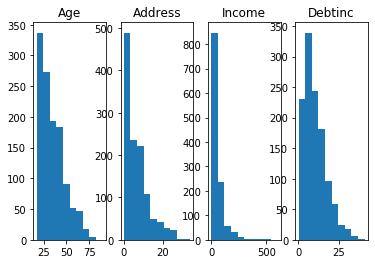

In [163]:
fig, df_plot=plt.subplots(nrows=1,ncols=4)
df_plot[0].hist(df['Age'], range=[17,90])
df_plot[0].set_title('Age')
df_plot[1].hist(df['Address'])
df_plot[1].set_title('Address')
df_plot[2].hist(df['Income'], range=[0,600])
df_plot[2].set_title('Income')
df_plot[3].hist(df['Debtinc'])
df_plot[3].set_title('Debtinc')
df_plot


modi_df=df.copy()



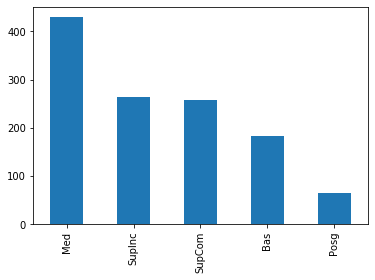

In [164]:
pd.Series(df['Education']).value_counts().plot('bar')

In [165]:
df.isna().any(axis = 0)

customer       False
Age             True
Employ         False
Address         True
Income          True
Debtinc         True
Creddebt       False
OthDebt        False
Education       True
Nationality    False
Default        False
dtype: bool

In [166]:
moda_edad =  float(df['Age'].mode())
modi_df.loc[modi_df['Age']>100 , 'Age'] = np.nan
modi_df['Age'].fillna(value = moda_edad, inplace=True)
moda_adress = float(df['Address'].mode())
modi_df['Address'].fillna(value=moda_adress,inplace=True)

In [167]:
linreg = LinearRegression()
modi_income_temp = modi_df.copy()
modi_income_temp = modi_income_temp.drop(columns=['Default','Education','Nationality'])
modi_temp_x = modi_income_temp[modi_income_temp['Income'].notnull()].drop(columns="Income", axis=1)
modi_temp_y = modi_income_temp[modi_income_temp['Income'].notnull()]

modi_test = modi_income_temp[modi_income_temp['Income'].isnull()].drop("Income", axis=1)
modi_test

,customer,Age,Employ,Address,Debtinc,Creddebt,OthDebt
65,11712,35.0,6,5.0,2.5,0.45,0.20
152,61844,39.0,9,5.0,9.2,2.08,3.44


In [168]:
modi_temp_x = modi_temp_x.astype(float).fillna(0.0)
modi_test = modi_test.astype(float, errors='ignore').fillna(0.0)
modi_temp_y = modi_temp_y.astype(float).fillna(0.0)

In [169]:
linreg.fit(modi_temp_x,modi_temp_y)
predicted = linreg.predict(modi_test)
modi_df.Income[modi_df.Income.isnull()] = predicted

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:
modi_df['Debtinc'].interpolate(method='linear', inplace= True)

### 2.3 Aplique las técnicas de selección que considere pertinentes y elimine de la base aquellos atributos que no son relevantes según sus criterios, elimine al menos 2.

In [171]:
from scipy import stats
a = [1, 1, 0.9]
stats.zscore(a)
#modi_df['Debtinc']= 
#stats.zscore(modi_df['Debtinc'])


array([ 0.70710678,  0.70710678, -1.41421356])

In [172]:
print(modi_df.std())

customer    132024.173652
Age             13.252015
Employ           9.172897
Address          6.094983
Income         343.120621
Debtinc          6.857070
Creddebt         2.949625
OthDebt          5.619132
dtype: float64


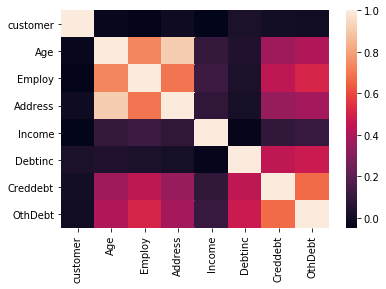

In [173]:
corr = modi_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Probar independencia de OthDebt con Employ

In [174]:
# Cálculo de frecuencias
pd.crosstab(modi_df['OthDebt'], modi_df['Employ']).head()

Employ,0,1,2,3,4,5,6,7,8,9,...,40,42,43,44,45,48,50,51,53,63
OthDebt,,,,,,,,,,,,,,,,,,,,,
0.01,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0.07,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.09,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.10,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.11,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
from scipy.stats import chi2_contingency

p_value_chi = chi2_contingency(pd.crosstab(modi_df['OthDebt'], modi_df['Employ']))[1]
if p_value_chi < 0.05:
    print('CHI-test : Rechazamos supuesto de independencia entre variables')
    print('p-value : {0}% \\n'.format(int(p_value_chi*100)))
else:
    print('CHI-test : No rechazamos el supuesto de independencia entre variables')
    print('p-value: {0}% \\n'.format(int(p_value_chi*100)))

CHI-test : Rechazamos supuesto de independencia entre variables
p-value : 0% \n


Ahora es necesario hacer el test para ver independencia entre Creddebt y Employ

In [176]:
pd.crosstab(modi_df['Creddebt'], modi_df['Employ']).head()

Employ,0,1,2,3,4,5,6,7,8,9,...,40,42,43,44,45,48,50,51,53,63
Creddebt,,,,,,,,,,,,,,,,,,,,,
0.01,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.02,2,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.03,3,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
0.04,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.05,2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
from scipy.stats import chi2_contingency

p_value_chi = chi2_contingency(pd.crosstab(modi_df['Creddebt'], modi_df['Employ']))[1]
if p_value_chi < 0.05:
    print('CHI-test : Rechazamos supuesto de independencia entre variables')
    print('p-value : {0}% \\n'.format(int(p_value_chi*100)))
else:
    print('CHI-test : No rechazamos el supuesto de independencia entre variables')
    print('p-value: {0}% \\n'.format(int(p_value_chi*100)))

CHI-test : Rechazamos supuesto de independencia entre variables
p-value : 0% \n


Al realizar los test de independencia, se comprueba que son variables que por un lado tienen varianza pequeña y además son independientes de aquellas variables con las que tienen mayor correlación.

Por tanto, procedemos a eliminar los atributos que muestran independencia respecto a Employ, es decir, OthDebt y Creddebt.

In [178]:
modi_df.drop(['OthDebt', 'Creddebt'], axis='columns', inplace=True)
modi_df.head(5)

,customer,Age,Employ,Address,Income,Debtinc,Education,Nationality,Default
0,10012,28.0,7,2.0,44.0,17.7,Med,N,N
1,10017,64.0,34,17.0,116.0,14.7,Posg,N,N
2,10030,40.0,20,12.0,61.0,4.8,Bas,N,N
3,10039,30.0,11,3.0,27.0,34.5,Bas,N,N
4,10069,25.0,2,2.0,30.0,22.4,Bas,N,S


### 2.4 Comente respecto a patrones encontrados entre clientes fugitivos y no fugitivos. Apóyese en gráficos y test estadísticos.

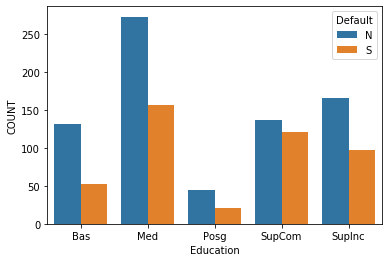

In [179]:
modi_df = modi_df.groupby(['Education', 'Default']).size().reset_index(name='COUNT')
sns.barplot(x='Education', y='COUNT', hue='Default', data=modi_df)

Como se observa en el gráfico, el nivel Medio de educación tiene mayor proporción de No fuga, mientras que en el nivel basico están los clientes fugitivos en cuanto a su proporción.

In [183]:
sns.scatterplot(x='Age', y='Income',  hue='Default', data=modi_df)

ValueError: Could not interpret input 'Age'

### 2.2 Aplique 2 métodos de transformación sobre 2 variables distintas, grafique la distribución antes y después. Comente si las transformaciones tienen sentido y cuál sería su utilidad

Las transformaciones a utilizar van a ser logaritmo y Z-Score para los atributos de Income y Debtinc respectivamente.

KeyError: 'Income'

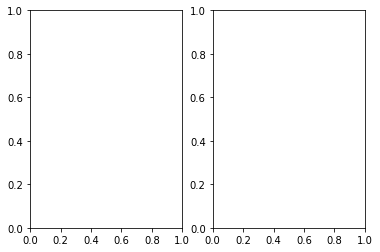

In [184]:
fig, df_mod=plt.subplots(nrows=1,ncols=2)
df_mod[0].hist(modi_df['Income'])
df_mod[0].set_title('Income')
df_mod[1].hist(modi_df['Debtinc'])
df_mod[1].set_title('Debtinc')


In [16]:
trans_df = modi_df.copy()\n
trans_df['Income']= np.log(trans_df['Income'])
trans_df['Debtinc']=stats.zscore(trans_df['Debtinc'])


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


NameError: name 'transfo_df' is not defined

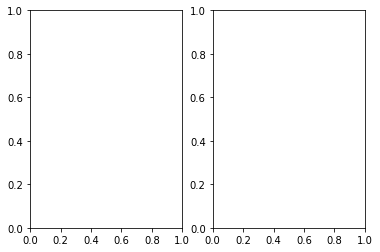

In [19]:
fig, df_after=plt.subplots(nrows=1,ncols=2)
df_after[0].hist(transfo_df['Income'])
df_after[0].set_title('Income')
df_after[1].hist(transfo_df['Debtinc'])
df_after[1].set_title('Debtinc')

#fig, df_after=plt.subplots(nrows=1,ncols=2)\n
#df_after[0].hist(trans_df['Income'])\n
#df_after[0].set_title('Income')\n
#df_after[1].hist(trans_df['Debtinc'])\n
#df_after[1].set_title('Debtinc')

Aplique las técnicas de selección que considere pertinentes y elimine de la base aquellos atributos que no son relevantes según sus criterios, elimine al menos 2.